In [89]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

import seaborn as sns

import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, RocCurveDisplay, roc_auc_score, roc_curve

import warnings

import os

In [90]:
warnings.filterwarnings("ignore")

In [91]:
CHECK_METRICS_CLASSIFICATION_PATH = os.path.abspath(os.path.join(os.getcwd(), '../../utils/check_metrics_classification.py'))

IMPORT_LIST_PATHS = [CHECK_METRICS_CLASSIFICATION_PATH]

for path in IMPORT_LIST_PATHS:
  with open(path) as file:
      exec(file.read())

In [92]:
df = pd.read_csv('yoga_TRAIN')
df.columns = range(len(df.iloc[0]))

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Columns: 427 entries, 0 to 426
dtypes: float64(426), int64(1)
memory usage: 997.6 KB


In [94]:
df

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,1,0.96769,0.95594,0.94516,0.87896,0.86663,0.85866,0.85172,0.84579,0.84090,...,0.75879,0.81326,0.86449,0.89717,0.93158,0.96224,0.94772,0.98331,0.96656,0.96656
1,2,0.96092,0.92833,0.89653,0.86557,0.83554,0.80644,0.77847,0.75142,0.72531,...,1.25130,1.21390,1.21600,1.22380,1.20910,1.16900,1.12970,1.09100,1.05310,1.02980
2,2,1.90820,1.87050,1.83370,1.79780,1.76290,1.72910,1.69640,1.63020,1.55850,...,1.80560,1.86160,1.88460,1.92150,1.95580,1.96770,1.98210,1.98310,1.95300,1.96270
3,1,2.01670,1.98640,1.95650,1.92720,1.89880,1.87080,1.84360,1.81720,1.79120,...,1.77030,1.82520,1.88040,1.90540,1.93240,1.98900,2.02130,2.03550,2.00030,2.00030
4,1,0.85663,0.83063,0.84637,0.90310,0.93856,0.96055,0.98312,1.00630,1.02990,...,0.24107,0.28735,0.33374,0.39324,0.44643,0.50221,0.56688,0.63181,0.68752,0.68752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2,1.25460,1.21200,1.16980,1.12810,1.08730,1.04690,1.00720,0.96822,0.92978,...,1.31710,1.23380,1.15740,1.19260,1.24040,1.28730,1.29630,1.29700,1.29990,1.30040
295,2,0.78762,0.80932,0.83165,0.85467,0.87836,0.90269,0.92766,0.95325,0.97947,...,0.15363,0.21838,0.28294,0.33502,0.39637,0.46209,0.52818,0.57655,0.59491,0.60674
296,2,1.08610,1.04680,1.07730,1.10690,1.13280,1.15920,1.18620,1.21370,1.24170,...,0.37648,0.42645,0.48838,0.55665,0.62507,0.68253,0.72718,0.77848,0.84681,0.88943
297,2,1.52450,1.51770,1.51130,1.50530,1.49970,1.49460,1.49000,1.48580,1.48200,...,1.06860,1.10790,1.14700,1.17810,1.21310,1.25280,1.29180,1.32370,1.36010,1.38490


In [95]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,1.00000,2.00000,2.0000,1.0000,1.00000,2.0000,1.00000,2.000000,1.00000,2.00000,...,2.00000,2.0000,2.0000,1.00000,2.0000,2.0000,2.00000,2.00000,2.0000,2.00000
1,0.96769,0.96092,1.9082,2.0167,0.85663,1.7037,0.92160,-0.031900,0.59522,0.96631,...,0.91673,1.2681,1.3083,0.35601,1.5521,1.2546,0.78762,1.08610,1.5245,0.87275
2,0.95594,0.92833,1.8705,1.9864,0.83063,1.6746,0.87460,-0.033907,0.63916,0.99007,...,0.93939,1.2503,1.3040,0.33635,1.5469,1.2120,0.80932,1.04680,1.5177,0.89224
3,0.94516,0.89653,1.8337,1.9565,0.84637,1.6458,0.91574,-0.034832,0.68341,1.01430,...,0.96262,1.2328,1.3002,0.31739,1.5420,1.1698,0.83165,1.07730,1.5113,0.91250
4,0.87896,0.86557,1.7978,1.9272,0.90310,1.6178,0.93915,-0.034529,0.72794,1.03900,...,0.98646,1.2163,1.2969,0.29916,1.5375,1.1281,0.85467,1.10690,1.5053,0.93351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.96224,1.16900,1.9677,1.9890,0.50221,1.7935,0.48947,-0.043022,0.16798,0.63851,...,0.64255,1.3523,1.3031,0.30995,1.3496,1.2873,0.46209,0.68253,1.2528,0.55125
423,0.94772,1.12970,1.9821,2.0213,0.56688,1.7586,0.55078,-0.054049,0.18234,0.67047,...,0.70804,1.3284,1.2962,0.32550,1.3869,1.2963,0.52818,0.72718,1.2918,0.61787
424,0.98331,1.09100,1.9831,2.0355,0.63181,1.7472,0.60184,-0.063917,0.25446,0.71641,...,0.75599,1.3051,1.2884,0.32553,1.4243,1.2970,0.57655,0.77848,1.3237,0.67492
425,0.96656,1.05310,1.9530,2.0003,0.68752,1.7663,0.66552,-0.072602,0.29950,0.76500,...,0.77540,1.2823,1.2811,0.31258,1.4561,1.2999,0.59491,0.84681,1.3601,0.69170


Спектрограмма классов йогов

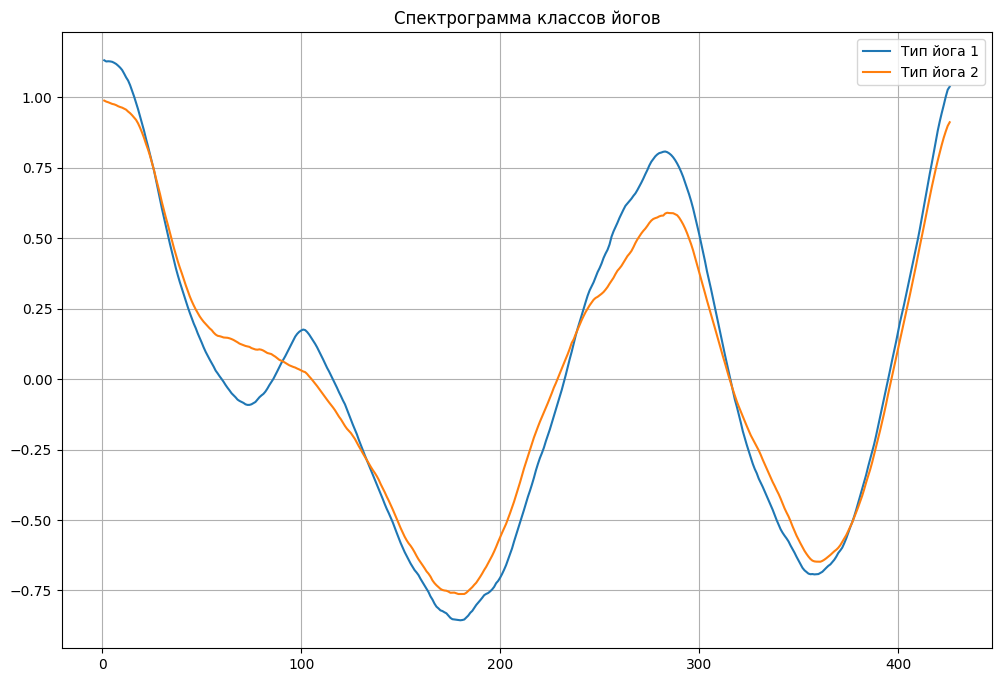

In [96]:
df_grouped = df.groupby(0)

plt.figure(figsize=(12, 8))
for wine_type, group in df_grouped:
    mean_spectrum = group.drop(columns=0).mean()
    plt.plot(mean_spectrum, label=f'Тип йога {wine_type}')

plt.title('Спектрограмма классов йогов')

plt.legend()
plt.grid(True)
plt.show()

Баланс сильно не нарушен - ок

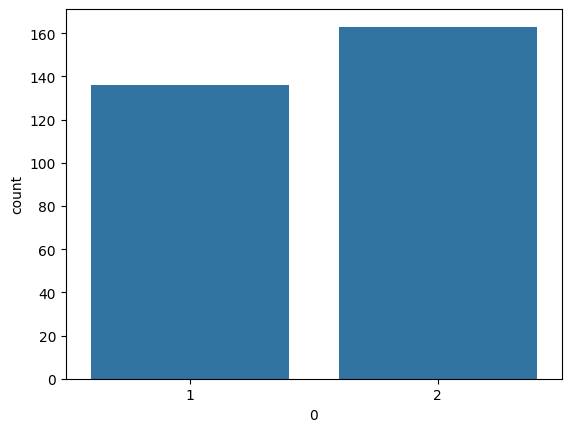

In [97]:
sns.barplot(df.iloc[:,0].value_counts())
plt.show()

In [98]:
def split_df(df):
  return df.iloc[:,1:], df.iloc[:,0]

In [99]:
X, y = split_df(df)

X, y

(         1        2        3        4        5        6        7        8    \
 0    0.96769  0.95594  0.94516  0.87896  0.86663  0.85866  0.85172  0.84579   
 1    0.96092  0.92833  0.89653  0.86557  0.83554  0.80644  0.77847  0.75142   
 2    1.90820  1.87050  1.83370  1.79780  1.76290  1.72910  1.69640  1.63020   
 3    2.01670  1.98640  1.95650  1.92720  1.89880  1.87080  1.84360  1.81720   
 4    0.85663  0.83063  0.84637  0.90310  0.93856  0.96055  0.98312  1.00630   
 ..       ...      ...      ...      ...      ...      ...      ...      ...   
 294  1.25460  1.21200  1.16980  1.12810  1.08730  1.04690  1.00720  0.96822   
 295  0.78762  0.80932  0.83165  0.85467  0.87836  0.90269  0.92766  0.95325   
 296  1.08610  1.04680  1.07730  1.10690  1.13280  1.15920  1.18620  1.21370   
 297  1.52450  1.51770  1.51130  1.50530  1.49970  1.49460  1.49000  1.48580   
 298  0.87275  0.89224  0.91250  0.93351  0.95533  0.97792  0.96670  0.97403   
 
          9        10   ...      417  

In [100]:
df_test = pd.read_csv('yoga_TEST')
X_test, y_test = split_df(df_test)

In [101]:
ENUM_MODEL_LIST = {
    'rfc': RandomForestClassifier,
    'logistic_regression': LogisticRegression
}

ENUM_MODEL_PARAMS = {
    'rfc': {
      'n_estimators': 500, 
      'max_depth': 37, 
      'min_samples_split': 2, 
      'min_samples_leaf': 1
    },
    'logistic_regression': {
     'penalty': 'l2', 
     'C': 0.7306604998624888
    }
}

In [102]:
def getModelParamsSuggestion(trial, model):
  params = {}

  match model:
    case 'rfc':
      params = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
      'max_depth': trial.suggest_int('max_depth', 2, 50),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
      }
    case 'logistic_regression':
      params = {
        'multi_class': 'multinomial',
        'solver':'lbfgs',
        'penalty': trial.suggest_categorical('penalty', ['l2']),
        'C': trial.suggest_loguniform('C', 0.01, 10.0)
      }

  return params

In [103]:
USING_MODEL = 'rfc'
RANDOM_STATE = 42

IS_RUN_OPTUNA = False

In [104]:
def objective(trial):
    params = getModelParamsSuggestion(trial, USING_MODEL)
    model = ENUM_MODEL_LIST[USING_MODEL](**params, random_state=RANDOM_STATE)
    
    model.fit(X, y)
    y_pred_test = model.predict(X_test)

    return accuracy_score(y_test, y_pred_test)

In [105]:
if IS_RUN_OPTUNA:
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    suggest_params = study.best_params
     
    print('\n suggested params', suggest_params)

In [106]:
model = ENUM_MODEL_LIST[USING_MODEL](**ENUM_MODEL_PARAMS[USING_MODEL], random_state=RANDOM_STATE)

model

RandomForestClassifier(max_depth=37, n_estimators=500, random_state=42)

In [107]:
model.fit(X, y)

RandomForestClassifier(max_depth=37, n_estimators=500, random_state=42)

In [108]:
y_pred_test = model.predict(X_test)

In [109]:
check_metrics_classification(model, X_test, y_test, y_pred_test)

Accuracy: 0.8132710903634545
Classification report:               precision    recall  f1-score   support

           1       0.82      0.76      0.79      1392
           2       0.81      0.86      0.83      1607

    accuracy                           0.81      2999
   macro avg       0.81      0.81      0.81      2999
weighted avg       0.81      0.81      0.81      2999



# Результат

RandomForestClassifier

In [110]:
model_rfc = ENUM_MODEL_LIST['rfc'](**ENUM_MODEL_PARAMS['rfc'], random_state=RANDOM_STATE)

model_rfc.fit(X, y)
y_pred_test = model_rfc.predict(X_test)
y_pred_test = model_rfc.predict(X_test)

check_metrics_classification(model, X_test, y_test, y_pred_test)

Accuracy: 0.8132710903634545
Classification report:               precision    recall  f1-score   support

           1       0.82      0.76      0.79      1392
           2       0.81      0.86      0.83      1607

    accuracy                           0.81      2999
   macro avg       0.81      0.81      0.81      2999
weighted avg       0.81      0.81      0.81      2999



Logistic regression

In [111]:
model_logistic_regression = ENUM_MODEL_LIST['logistic_regression'](**ENUM_MODEL_PARAMS['logistic_regression'], random_state=RANDOM_STATE)

model_logistic_regression.fit(X, y)
y_pred_test = model_logistic_regression.predict(X_test)
y_pred_test = model_logistic_regression.predict(X_test)

check_metrics_classification(model, X_test, y_test, y_pred_test)

Accuracy: 0.6518839613204401
Classification report:               precision    recall  f1-score   support

           1       0.64      0.57      0.60      1392
           2       0.66      0.73      0.69      1607

    accuracy                           0.65      2999
   macro avg       0.65      0.65      0.65      2999
weighted avg       0.65      0.65      0.65      2999



Лучшим результатом признана модель Random Forest Classifier с точностью ~ `0.81`

Переобучения/недообучения замечено не было